In [158]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [159]:
pd.set_option('display.max_columns', 500)
import matplotlib 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
plt.rcParams['figure.figsize'] = 12, 6

In [160]:

df = pd.read_csv('zillow_data copy.txt')

In [161]:
df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [146]:
print(df[df['City']=='Chicago']['RegionName'].nunique())
print(df[df['State']=='DC']['RegionName'].nunique())
# print(df[df['Metro']=='Chicago']['RegionName'].nunique())

41
18


In [162]:
# get the DC data
dc_df = df[df['State']=='DC']
# drop unused columns
dc_df.drop(['RegionID','City','Metro','CountyName','SizeRank','State'],
           axis=1, inplace=True)
# get the list of zipcodes 
zipcodes = list(dc_df['RegionName'])
dc_df.drop(['RegionName'],axis=1,inplace=True)

In [163]:
dc_df_T = dc_df.transpose(copy=True)
dc_df_T.reset_index()
# dc_time_stamp = pd.DataFrame()
dc_df_T['date'] = pd.to_datetime(dc_df_T.index)
dc_df_T.set_index('date', inplace=True)
dc_df_T.columns = zipcodes
dc_df_T.head()

,20002,20009,20011,20019,20001,20020,20008,20003,20032,20016,20010,20007,20024,20017,20018,20037,20015,20012
date,,,,,,,,,,,,,,,,,,
1996-04-01,94300.0,178800.0,118900.0,91300.0,92000.0,104500.0,450100.0,130000.0,85700.0,362000.0,110500.0,358100.0,209800.0,121700.0,123000.0,277800.0,312400.0,185000.0
1996-05-01,94000.0,179200.0,118500.0,91000.0,92600.0,103800.0,448200.0,130100.0,85500.0,361200.0,111200.0,356000.0,208200.0,121400.0,122400.0,275800.0,311000.0,184900.0
1996-06-01,93700.0,179600.0,118200.0,90600.0,93200.0,103000.0,446300.0,130200.0,85400.0,360300.0,112000.0,353900.0,206600.0,121200.0,121800.0,273700.0,309800.0,184700.0
1996-07-01,93600.0,180000.0,117800.0,90400.0,93900.0,102200.0,444500.0,130400.0,85200.0,359400.0,112900.0,351700.0,205000.0,121000.0,121200.0,271600.0,308700.0,184400.0
1996-08-01,93400.0,180300.0,117600.0,90100.0,94600.0,101400.0,442900.0,130600.0,85000.0,358500.0,113800.0,349600.0,203300.0,120900.0,120700.0,269500.0,307900.0,184100.0


In [136]:
dc_df_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 18 columns):
20002    265 non-null float64
20009    265 non-null float64
20011    265 non-null float64
20019    265 non-null float64
20001    265 non-null float64
20020    265 non-null float64
20008    265 non-null float64
20003    265 non-null float64
20032    265 non-null float64
20016    265 non-null float64
20010    265 non-null float64
20007    265 non-null float64
20024    265 non-null float64
20017    265 non-null float64
20018    265 non-null float64
20037    265 non-null float64
20015    265 non-null float64
20012    265 non-null float64
dtypes: float64(18)
memory usage: 39.3 KB


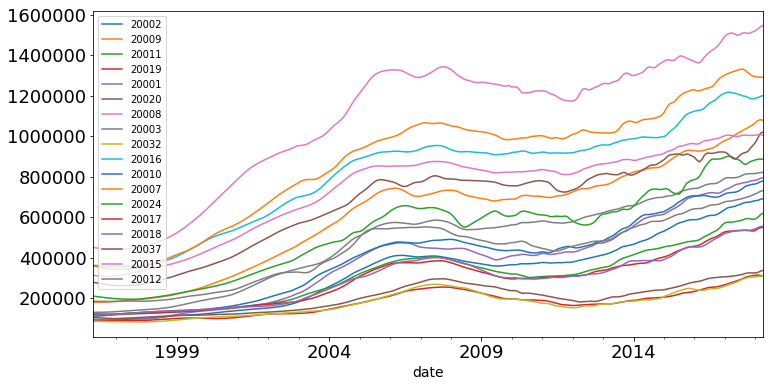

In [137]:
# check for NA
dc_df_T.plot()

In [164]:
zipcode = zipcodes[17]
ycut = '2012'
y = dc_df_T[zipcode].resample('MS').mean()
y = y[ycut:]
# y#.plot()
# plt.grid(True)

# dc_df.plot()
# plt.xlabel()

In [156]:
# dc_df_T['date1'] = dc_df_T.index.astype(int)
# X = dc_df_T['date1'][ycut:].values.reshape(-1, 1)
# y2 = y.values.reshape(-1,1)
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# LR = LinearRegression()
# LR.fit(X,y2)
# pred = LR.predict(X)

# plt.figure(figsize=(10,6))
# plt.plot(X,y)
# plt.plot(X, pred)

# r2_score(y, pred)

# Some functions

In [79]:
"""
ADF_Test 
print out parameters from the Dickey-Fuller test
"""
def ADF_Test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Lets make it stationary

In [80]:
def Compare_Transformations(data, tdata):
    tdiff = data - tdata
    tdiff.dropna(inplace=True)
    ADF_Test(tdiff)
#     fig = plt.figure(figzise=(4,4))
    data.plot()
    tdata.plot()
    pass



def Trend_elimination(data):
    # log data
    print('Log data')
    data_log = np.log(data)
    Compare_Transformations(data, data_log)
    # sqrt
    print('sqrt')
    data_sqrt = np.sqrt(data)
    Compare_Transformations(data, data_sqrt)

    print('diff 1')
    # diff
    data_diff = data.diff()
    Compare_Transformations(data, data_diff)
    print('rolling mean on data')
    # rolling mean
    data_roll_mean = data.rolling(window=3).mean()
    Compare_Transformations(data, data_roll_mean)
    # EWM
    print('ewm on data')
    data_ewm = data.ewm(halflife= 2).mean()
    Compare_Transformations(data, data_ewm)
    
    # on the log
    # rolling mean
    print('rolling mean on log data')
    data_log_roll_mean = data_log.rolling(window=3).mean()
    Compare_Transformations(data, data_log_roll_mean)
    # EWM
    print('EWM on log data')
    data_log_ewm = data_log.ewm(halflife= 2).mean()
    Compare_Transformations(data, data_log_ewm)
    print('EWM on rolling mean of log data')
    data_log_roll_mean_ewm = data_log_roll_mean.ewm(halflife=2).mean()
    Compare_Transformations(data, data_log_roll_mean_ewm)
    

Log data
Results of Dickey-Fuller Test:
Test Statistic                 -1.370662
p-value                         0.596257
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64
sqrt
Results of Dickey-Fuller Test:
Test Statistic                 -1.370158
p-value                         0.596496
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64
diff 1
Results of Dickey-Fuller Test:
Test Statistic                  0.216703
p-value                         0.973183
#Lags Used                      3.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.58

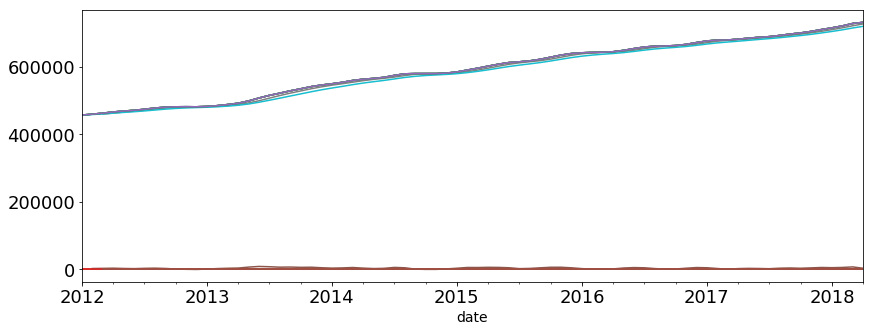

In [81]:
Trend_elimination(y)
# y_sqrt.plot()


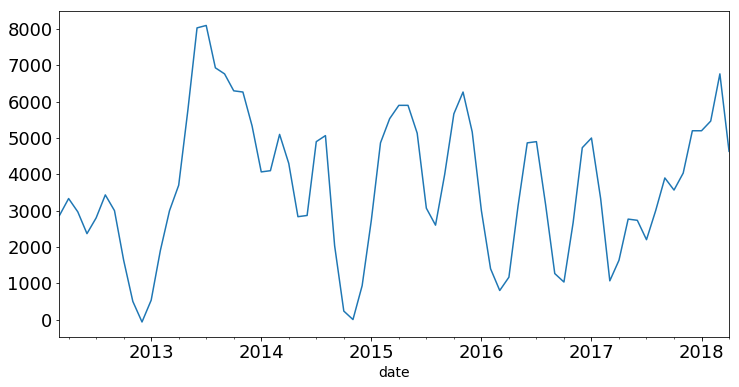

In [82]:
data_roll_mean = y.rolling(window=3).mean()
y_rmean_diff = y - data_roll_mean
y_rmean_diff.dropna(inplace=True)
fig = plt.figure(figsize=(12,6))
# y.plot()
# data_roll_mean.plot()
y_rmean_diff.plot()

# data_roll_mean = (np.log(y)).rolling(window=3).mean()
# fig = plt.figure(figsize=(12,6))
# y.plot()
# data_roll_mean.plot()

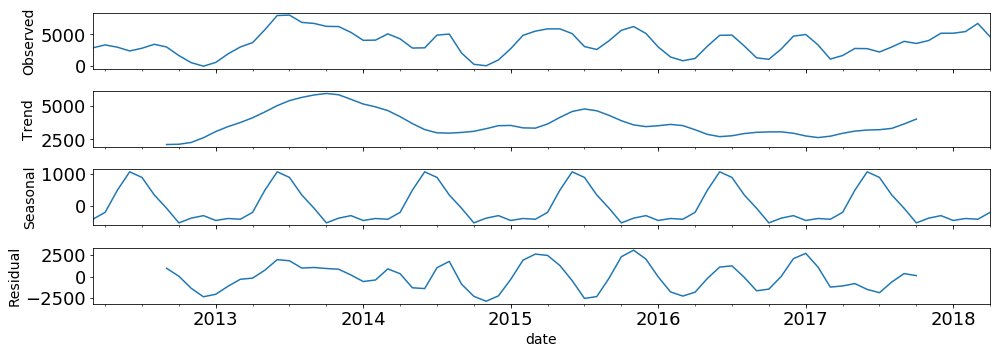

In [83]:
decomp = sm.tsa.seasonal_decompose(y_rmean_diff, model='additive')
fig = decomp.plot()

# ACF and PACF 

1.0
0.11611370346561523
-0.006170275138283671
-0.02422033935801737
-0.010892709297488763
-0.0302128589008524
-0.09721219603366864
-0.1996994504965227
-0.3209103027027818
-0.4021088005066053
-0.35825503734403025
-0.19955383473829655
-0.0825666903502574
-0.0888984587333382
-0.15237703123317825
-0.17039092265299016
-0.11361348557134747
-0.015019746188978918
0.07748119517603054
0.1589025661473247
0.21967401502108075
0.21146055177155124
0.10856355714670231
-0.016714252603548696
-0.04963472026566648
0.009318158823855914
0.06066727530929925
0.05168452626961058
-0.005264337531476765
-0.06950663077533548
-0.0845994185635672
-0.06729485376427918
-0.08018361048405946
-0.10652668464029073
-0.09140105364254261
-0.05560291300703483
-0.06501138807655553
-0.10193574275972414
-0.11009846588266563


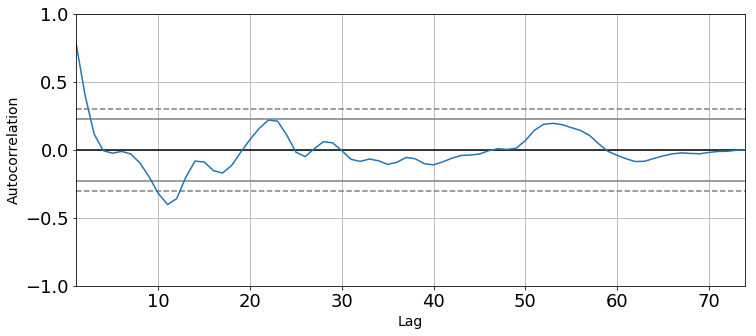

In [196]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(y_rmean_diff);


# acfarray
# confintarray

from statsmodels.tsa.stattools import acf
acfarray, confintarray = acf(y_rmean_diff, alpha=.05)

for i,v in enumerate(acfarray):
    if (v <= confintarray[i][0]) or (v >= confintarray[i][1]):
        print(v)
        
confintarray

obvs =len(y_rmean_diff)

for i in acfarray:
    if (i <= (-1.96 / np.sqrt(obvs))) or (i <= (1.96 / np.sqrt(obvs))):
        print(i)

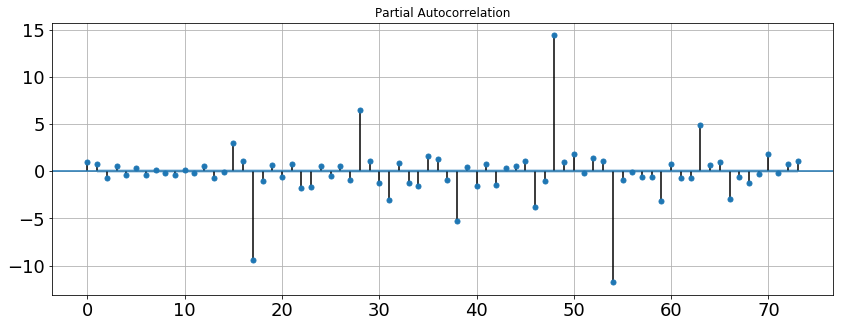

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(y_rmean_diff, lags = 200);
plt.grid(True)

In [157]:
p = d =range(0,2)
q = range(4,6)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p, d, q))]

# 12 is for the seasons. Since our data is monthly, we use 12.

In [95]:
d

range(0, 2)

In [96]:
mod = sm.tsa.statespace.SARIMAX(y[ycut:],
                                            order=(1,1,1),
                                            seasonal_order=(1,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              20012   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -434.446
Date:                            Tue, 18 Jun 2019   AIC                            878.891
Time:                                    12:16:49   BIC                            888.350
Sample:                                01-01-2012   HQIC                           882.480
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6282      0.144      4.359      0.000       0.346       0.911
ma.L1          0.1379      0.099      1.394      0.163      -0.056       0.332
ar.S.L12      -0.7179      0.168     -4.270      0.000      -1.047      -0.388
ma.S.L12      -0.0022      0.014     -0.160      0.873      -0.029       0.024
sigma2      3.845e+06   4.52e-09   8.51e+14      0.000    3.84e+06    3.84e+06
===================================================================================
Ljung-Box (Q):                       80.76   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.00   Prob(JB):                         0.55
Heteroskedasticity (H):               1.24   Skew:                            -0.14
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+31. Standard errors may be unstable.
"""

## SARIMAX Model

In [93]:
lowest_AIC =1e14

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
#             mod = ARIMA(y, order=param)
            print('ARIMA{}x{} '.format(param,param_seasonal))
            mod = sm.tsa.statespace.SARIMAX(y[ycut:],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param,
                                           param_seasonal, 
                                           results.aic))            
#             print('ARIMA{} - AIC:{}'.format(param,results.aic))

            if results.aic < lowest_AIC:
                lowest_AIC = results.aic
                print('ARIMA{}x{} - AIC:{}'.format(param,
                                               param_seasonal, 
                                               results.aic))
                print('\t low **************')  
        except:
            continue

ARIMA(0, 0, 4)x(0, 0, 4, 12) 
ARIMA(0, 0, 4)x(0, 0, 5, 12) 
ARIMA(0, 0, 4)x(0, 0, 6, 12) 
ARIMA(0, 0, 4)x(0, 0, 7, 12) 
ARIMA(0, 0, 4)x(0, 1, 4, 12) 
ARIMA(0, 0, 4)x(0, 1, 5, 12) 
ARIMA(0, 0, 4)x(0, 1, 6, 12) 
ARIMA(0, 0, 4)x(0, 1, 7, 12) 
ARIMA(0, 0, 4)x(1, 0, 4, 12) 
ARIMA(0, 0, 4)x(1, 0, 5, 12) 
ARIMA(0, 0, 4)x(1, 0, 6, 12) 
ARIMA(0, 0, 4)x(1, 0, 7, 12) 
ARIMA(0, 0, 4)x(1, 1, 4, 12) 
ARIMA(0, 0, 4)x(1, 1, 5, 12) 
ARIMA(0, 0, 4)x(1, 1, 6, 12) 
ARIMA(0, 0, 4)x(1, 1, 7, 12) 
ARIMA(0, 0, 5)x(0, 0, 4, 12) 
ARIMA(0, 0, 5)x(0, 0, 5, 12) 
ARIMA(0, 0, 5)x(0, 0, 6, 12) 
ARIMA(0, 0, 5)x(0, 0, 7, 12) 
ARIMA(0, 0, 5)x(0, 1, 4, 12) 
ARIMA(0, 0, 5)x(0, 1, 5, 12) 
ARIMA(0, 0, 5)x(0, 1, 6, 12) 
ARIMA(0, 0, 5)x(0, 1, 7, 12) 
ARIMA(0, 0, 5)x(1, 0, 4, 12) 
ARIMA(0, 0, 5)x(1, 0, 5, 12) 
ARIMA(0, 0, 5)x(1, 0, 6, 12) 
ARIMA(0, 0, 5)x(1, 0, 7, 12) 
ARIMA(0, 0, 5)x(1, 1, 4, 12) 
ARIMA(0, 0, 5)x(1, 1, 5, 12) 
ARIMA(0, 0, 5)x(1, 1, 6, 12) 
ARIMA(0, 0, 5)x(1, 1, 7, 12) 
ARIMA(0, 0, 6)x(0, 0, 4, 12) 
ARIMA(0, 0

In [92]:
# from statsmodels.tsa.arima_model import ARIMA
# mod = ARIMA(y,order=(2,0,2)) 

mod = sm.tsa.statespace.SARIMAX(y, 
                               order=(1,1,7),
                               seasonal_order=(1,1,7,12),
                               enforce_stationarity=False, 
                               enforse_invertibility=False)
results = mod.fit()
results.summary()

# results.plot_diagnostics(figsize=(16,8))
# plt.show()

ValueError: maxlag should be < nobs

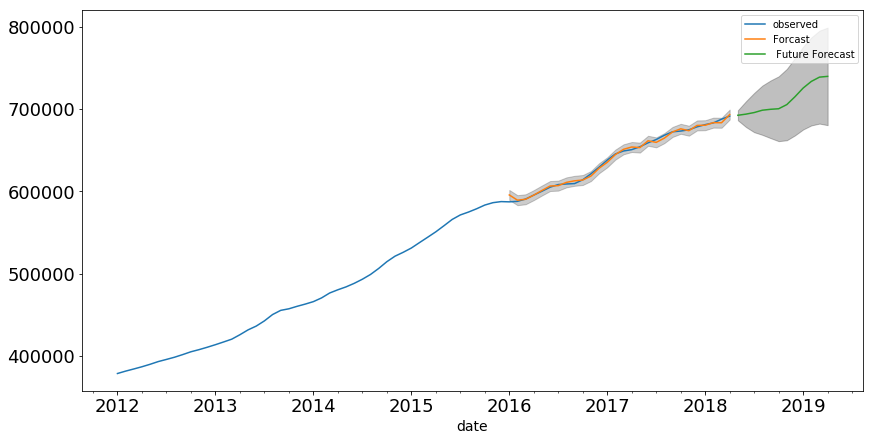

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'),
                             dynamic=False)
pred_ci = pred.conf_int() 



ax = y.plot(label='observed')
pred.predicted_mean.plot(ax = ax, label='Forcast',figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.2)

pred_future = results.get_forecast(steps=12)
pred_ci2 = pred_future.conf_int()

pred_future.predicted_mean.plot(ax=ax, label=' Future Forecast')
ax.fill_between(pred_ci2.index, 
               pred_ci2.iloc[:,0],
               pred_ci2.iloc[:,1], color='k',alpha = 0.25)
plt.legend()